# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [1]:
## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('orders.csv')
print(df.shape)
df.isna().sum()

(5000, 7)


order_id          0
shop_id           0
user_id           0
order_value       0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [3]:
df.sample(10)

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
4136,4137,100,888,111,1,credit_card,2017-03-04 18:45:20
1121,1122,49,767,516,4,credit_card,2017-03-21 22:37:51
4576,4577,33,986,173,1,cash,2017-03-20 3:16:57
1882,1883,61,819,158,1,cash,2017-03-19 1:13:49
4855,4856,81,914,708,4,credit_card,2017-03-06 12:37:42
2219,2220,14,871,116,1,credit_card,2017-03-28 8:41:36
4252,4253,3,809,592,4,debit,2017-03-15 20:48:19
1678,1679,100,985,111,1,debit,2017-03-10 4:15:42
942,943,93,915,456,4,cash,2017-03-12 7:00:39
3869,3870,22,963,292,2,debit,2017-03-08 22:02:38


<AxesSubplot:title={'center':'Distribution of Order Values'}, ylabel='Frequency'>

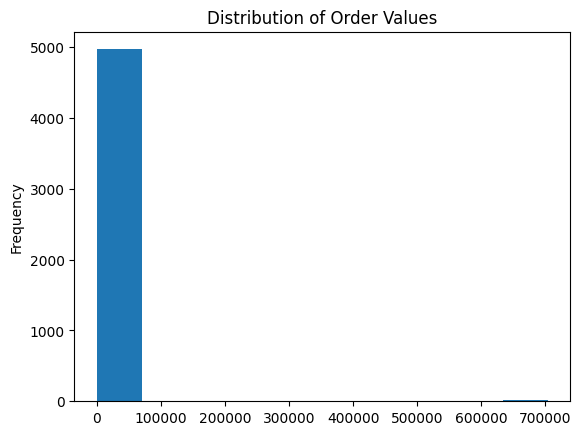

In [4]:
df.order_value.plot.hist(title = 'Distribution of Order Values')

We can see that there is a tiny frequency for orders around $700000 (the actual value is 704000), and every other order is many orders of magnitude less. We can be more precise by getting some counts on the dataframe:

In [10]:
print(len(df[df['order_value'] < 1000]))
print(len(df[df['order_value'] > 700000]))
print(len(df[df['order_value'] > 10000]))
print(len(df))

4929
17
63
5000


Almost every single order of the 5000 total orders costs under $1000, but we have 17 orders costing over $700000. We also have a few (63)orders that cost over $10000, still a very high amount compared to the majority of the data. Since outliers have a heavy impact on the average, the AOV is heavily skewed, hence it is extremely high at $3145.

## New Metric

For the new metric, we can try using the **median** instead. This will significantly reduce the impact of the few extremely high orders and give a better representation of what sort of order values we can expect, most of the time.

In [6]:
df['order_value'].median()

284.0

The median order value of $284 is much more believable and within the reasonable price range of buying a few pairs of shoes.

<AxesSubplot:xlabel='date'>

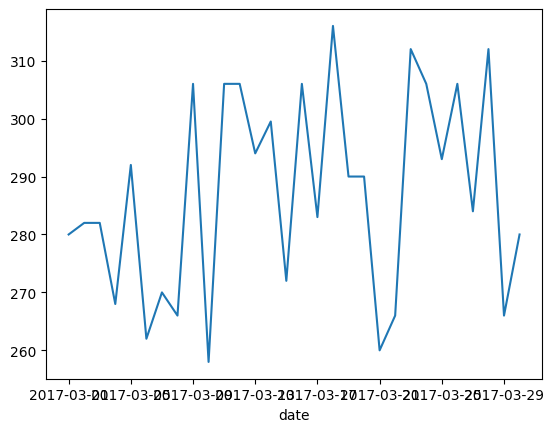

In [47]:
df['created_datetime'] = pd.to_datetime(df['created_at'])
df['date'] = [r.date() for r in df.created_datetime]
df['hour'] = [r.hour for r in df.created_datetime]
df.groupby('date')['order_value'].median().plot()

<AxesSubplot:xlabel='hour'>

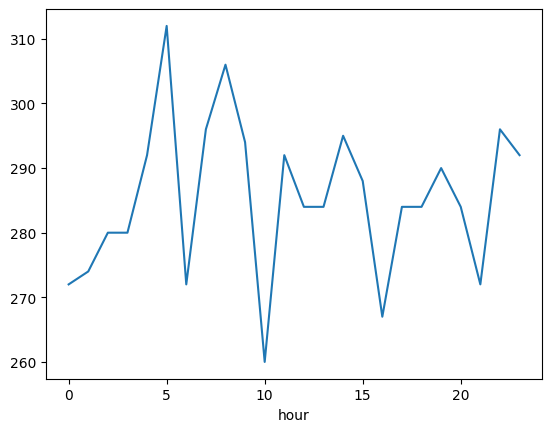

In [48]:
df.groupby('hour')['order_value'].median().plot()

<AxesSubplot:xlabel='date'>

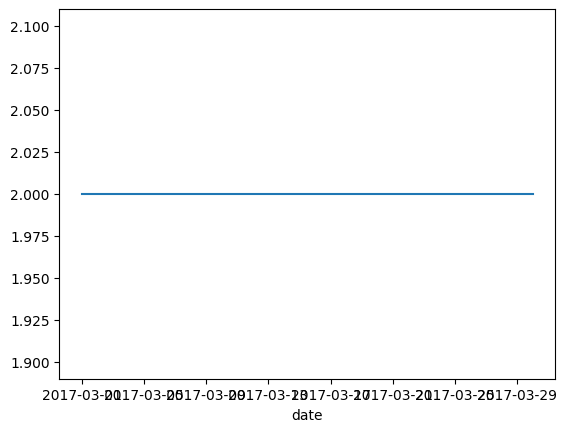

In [53]:
df.groupby('date')['total_items'].median().plot()

<AxesSubplot:xlabel='hour'>

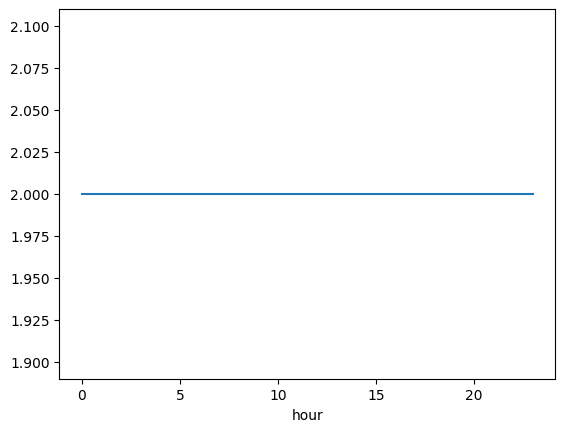

In [54]:
df.groupby('hour')['total_items'].median().plot()

We can see that there is a lot of day-to-day variation in median order value, but the median number of items purchased is relatively constant at 2. The same applies to the time of day (hour). We are seeing a high median order value for purchases made during early morning/late night which may have to do with large orders from companies not coming in during normal store hours, while smaller orders from average customers do.